#### Objective 1
##### Explore and QA the data by making sure columns have the proper data types, changing column names, and extracting datetime components.

In [15]:
import pandas as pd

video_games =  (
    pd.read_csv("vgchartz-2024.csv", parse_dates=["release_date"])
    .rename({
        "title": "Title",
        "console": "Console",
        "genre": "Genre",
        "publisher": "Publisher",
        "developer": "Developer"
    }, axis =1)
    .assign(release_year = lambda x: x["release_date"].dt.year)
)

video_games.head()

,img,Title,Console,Genre,Publisher,Developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN,2013.0
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,2014.0
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN,2002.0
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN,2013.0
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,2015.0


In [18]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   img           64016 non-null  object        
 1   Title         64016 non-null  object        
 2   Console       64016 non-null  object        
 3   Genre         64016 non-null  object        
 4   Publisher     64016 non-null  object        
 5   Developer     63999 non-null  object        
 6   critic_score  6678 non-null   float64       
 7   total_sales   18922 non-null  float64       
 8   na_sales      12637 non-null  float64       
 9   jp_sales      6726 non-null   float64       
 10  pal_sales     12824 non-null  float64       
 11  other_sales   15128 non-null  float64       
 12  release_date  56965 non-null  datetime64[ns]
 13  last_update   17879 non-null  object        
 14  release_year  56965 non-null  float64       
dtypes: datetime64[ns](1), float64(7), ob

In [19]:
video_games.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,release_year
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000,56965,56965.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041,2006-11-14 06:33:03.491617792,2006.359572
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1971-12-03 00:00:00,1971.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000,2001-03-28 00:00:00,2001.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000,2008-09-16 00:00:00,2008.000000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000,2012-12-27 00:00:00,2012.000000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000,2024-12-31 00:00:00,2024.000000
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643,NaN,8.617813


#### Objective 2
##### Reshape the data into two tables ready to be used for charts & graphs.

In [35]:
annual_sales = video_games.groupby("release_year", as_index=False).agg({"total_sales": "sum"})

annual_sales.head()

,release_year,total_sales
0,1971.0,0.00
1,1973.0,0.00
2,1975.0,0.00
3,1977.0,2.50
4,1978.0,2.36


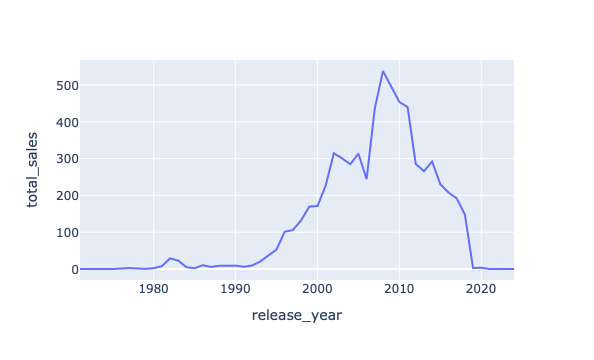

In [36]:
import plotly.express as px

px.line(annual_sales, x="release_year", y="total_sales")

In [37]:
top10_titles = (
    video_games.groupby("Title", as_index=False)
    .agg({"total_sales": "sum"})
    .sort_values("total_sales", ascending=False)
    .iloc[:10]
)
top10_titles.head()

,Title,total_sales
13724,Grand Theft Auto V,64.29
5266,Call of Duty: Black Ops,30.99
5281,Call of Duty: Modern Warfare 3,30.71
5273,Call of Duty: Black Ops II,29.59
5277,Call of Duty: Ghosts,28.80


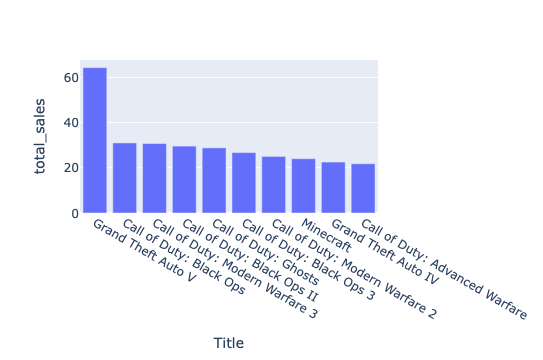

In [38]:
px.bar(top10_titles, x="Title", y="total_sales")

#### Objective 3
##### Create an interactive dashboard with two charts displaying sales metrics.

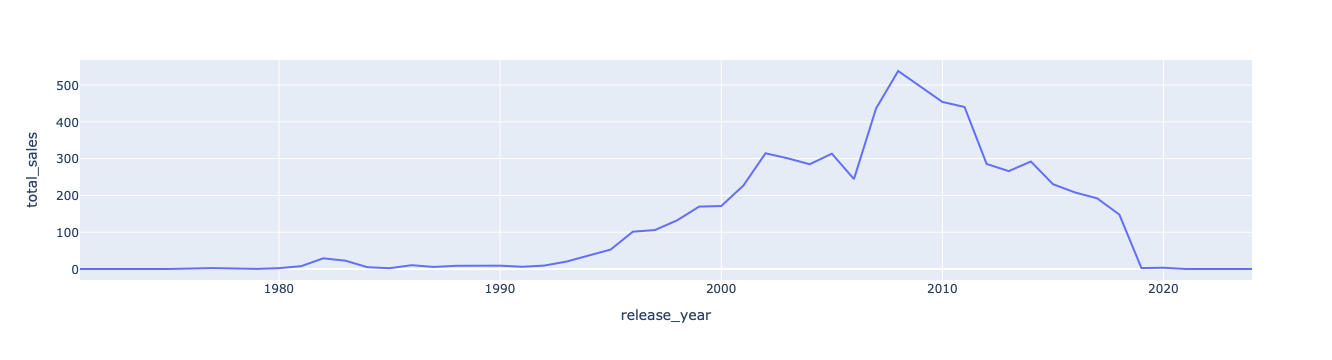

In [40]:
px.line(annual_sales, x="release_year", y="total_sales")

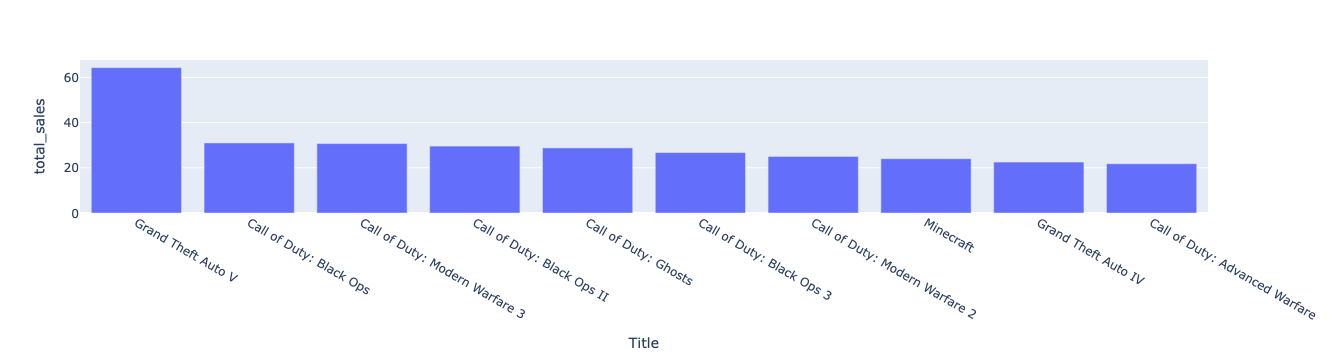

In [42]:
px.bar(top10_titles, x="Title", y="total_sales")

In [53]:
!pip install dash-bootstrap-templates
!pip install dash-bootstrap-components

In [7]:
from dash import Dash, dcc, html
from dash.dependencies import Output, Input
from dash_bootstrap_templates import load_figure_template
import dash_bootstrap_components as dbc

import plotly.express as px
import pandas as pd
import numpy as np

video_games =  (
    pd.read_csv("vgchartz-2024.csv", parse_dates=["release_date"])
    .rename({
        "title": "Title",
        "console": "Console",
        "genre": "Genre",
        "publisher": "Publisher",
        "developer": "Developer"
    }, axis =1)
    .assign(release_year = lambda x: x["release_date"].dt.year)
)

dbc_css = "http://cdn.jsdelivr.net/gh/AnnMarieW/dash-bootstrap-templates/dbc.min.css"

app = Dash(__name__, external_stylesheets=[dbc.themes.CYBORG, dbc_css])

load_figure_template("CYBORG")

app.layout = dbc.Container([
    html.H1("Video Game Explorer", style={"text-align": "center"}),
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dcc.Markdown("**Select A Category**"),
                dcc.Dropdown(
                    id="category-dropdown",
                    options=["Title","Genre","Publisher","Developer","Console"], value="Title", className="dbc"),
            ])
        ]),
        dbc.Col([
            dbc.Card([
                dcc.Markdown("**Select A Region**"),
                dcc.RadioItems(
                    id="region-radio",
                    options={
                        "total_sales": "World Total",
                        "na_sales": "North America",
                        "jp_sales": "Japan",
                        "pal_sales": "Europe/Africa",
                        "other_sales": "Rest of World"}, value="total_sales", className="dbc"),
            ])
        ]),   ]),
    html.Br(),
    dbc.Row(dcc.Graph(id="sales-line")),
    html.Br(),
    dbc.Row(dcc.Graph(id="rankings-bar")),
])

@app.callback(
    Output("sales-line", "figure"),
    Output("rankings-bar", "figure"),
    Input("category-dropdown", "value"),
    Input("region-radio", "value"),
)

def vg_plotter(category, region):

    annual_sales = video_games.groupby("release_year", as_index=False).agg({region: "sum"})

    fig = px.line(
        annual_sales,
        x="release_year",
        y=region,
        title= f"Video Game Sale in {region} Over Time"
    ).update_layout(title_x=0.5)

    top10_sellers = (
           video_games
           .groupby(category, as_index=False)
           .agg({region: "sum"})
           .sort_values(region, ascending=False)
          .iloc[:10]
    )

    fig2 = px.bar(
            top10_sellers,
            x=category,
            y=region,
            title=f"Top Video Game Sales by Cateogry"
    ).update_layout(title_x=0.5)

    return fig, fig2

app.run(port=8052)

if __name__ == "__main__":
    app.run()

Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


SystemExit: 1

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.

